In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('laptop_data.csv')

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
temp=data['Ram']

In [10]:
temp=temp.str.replace('GB','')

In [11]:
temp

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [12]:
data['Ram']=temp

In [13]:
data['Ram']=data['Ram'].astype('int')

In [14]:
temp=data['Weight']

In [15]:
temp=temp.str.replace('kg','')

In [16]:
data['Weight']=temp
data['Weight']=data['Weight'].astype('float')

In [17]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


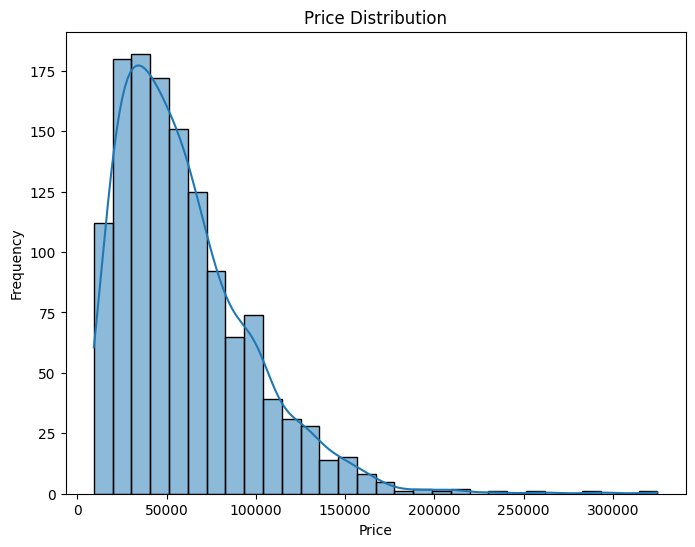

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
#Right Skewed Data,so we have to use algorithms accordingly

<Axes: xlabel='Company'>

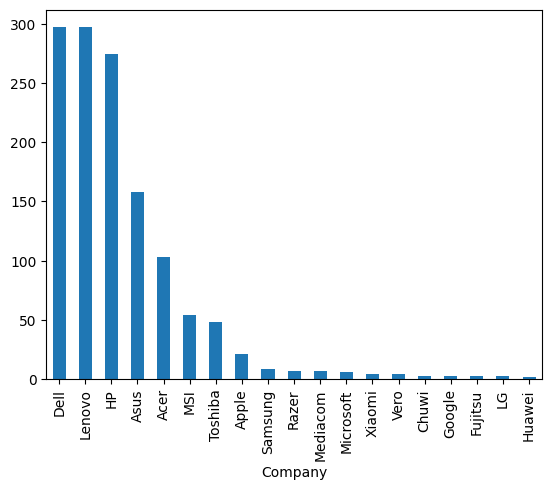

In [20]:
data['Company'].value_counts().plot(kind='bar')
#more no of laptops for dell

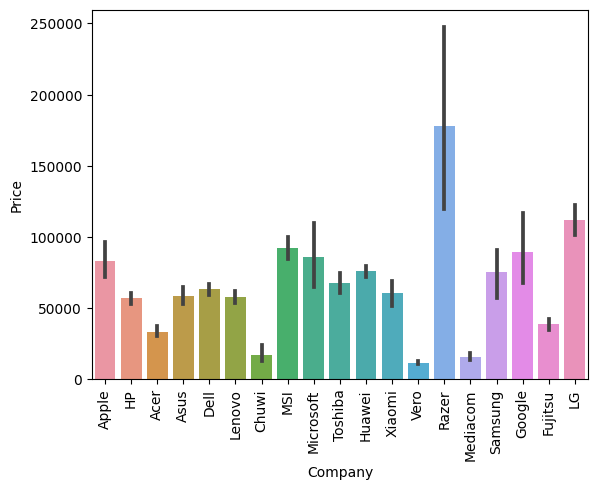

In [21]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()
#Razor has highest Price
# By default, sns.barplot() will calculate the mean (average) of the Price for each company and plot it.
# If multiple rows in data correspond to the same company, the heights of the bars will represent the average price for that company.

<Axes: xlabel='TypeName'>

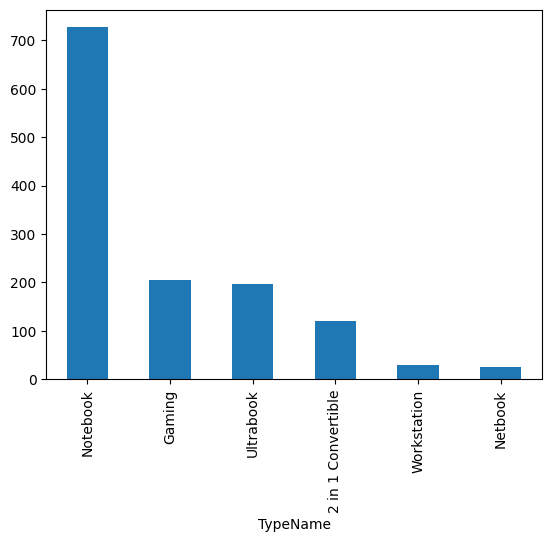

In [22]:
# let us see which notebook is more
data['TypeName'].value_counts().plot(kind='bar')

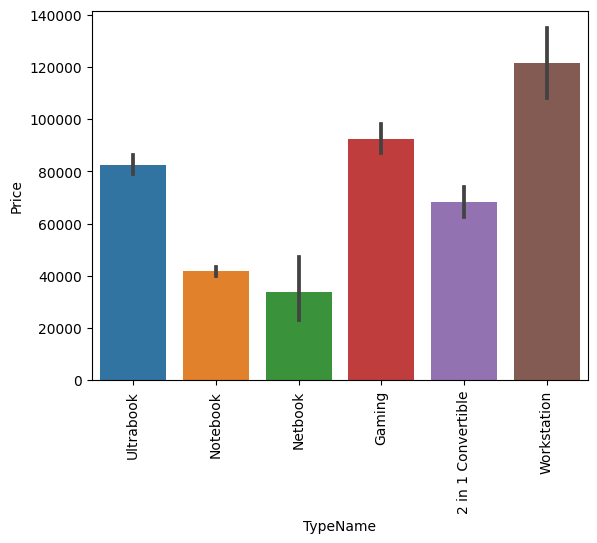

In [23]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()
#Razor has highest Price

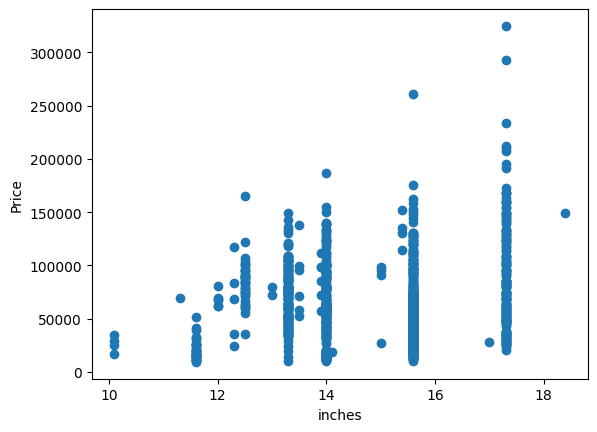

In [24]:
plt.scatter(data['Inches'],data['Price'])
plt.xlabel('inches')
plt.ylabel('Price')
plt.show()
# not much relation

In [25]:
data[['Inches','Price']].corr()

,Inches,Price
Inches,1.000000,0.068197
Price,0.068197,1.000000


In [26]:
data['ScreenResolution'].value_counts()
# data

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

## Screen Resolution

In [27]:
#let use see features included in Screen Resolution
data['IPS Panel']=data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x  else 0)

<Axes: xlabel='IPS Panel'>

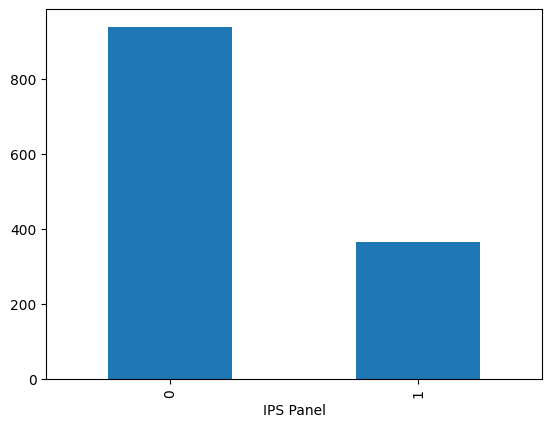

In [28]:
data['IPS Panel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS Panel', ylabel='Price'>

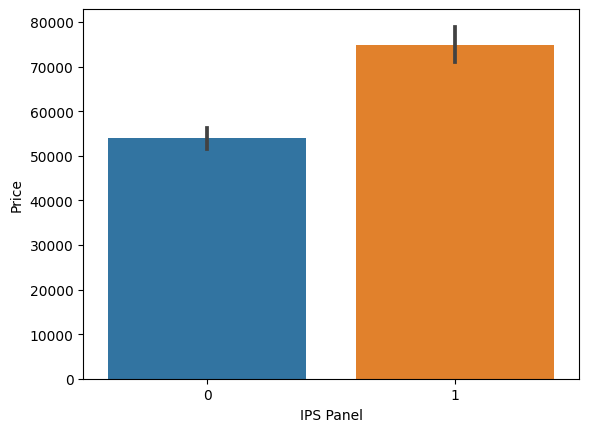

In [29]:
sns.barplot(x=data['IPS Panel'],y=data['Price'])#you can see that prices of laptops of type Ips panel screens is high

In [30]:
#let use see features included in Screen Resolution
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x  else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

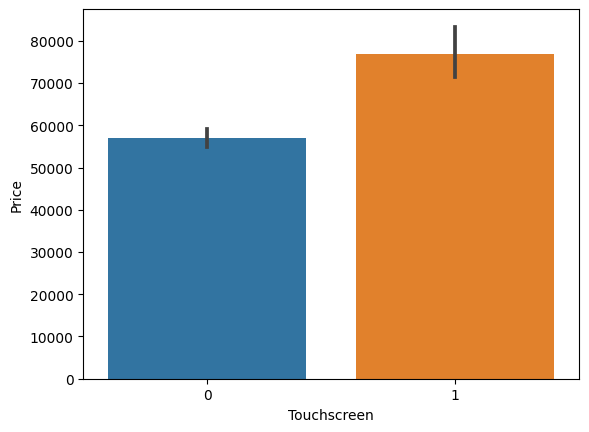

In [31]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])

In [32]:
data['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [33]:
#Now Let us separate the given resolution into x and y resolution


In [34]:
import re
pattern = r'\d+x\d+'
text='3800x4000'
# Search for the pattern in the text
resolution = re.search(pattern, text)


In [35]:
data['ScreenResolution']=data['ScreenResolution'].apply(lambda x:re.search(pattern,x).group())

In [36]:
data['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [37]:
data[['x_res','y_res']]=data['ScreenResolution'].str.split('x',expand=True)

In [38]:
data['x_res']=data['x_res'].astype('int')
data['y_res']=data['y_res'].astype('int')

In [39]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [40]:
data

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [41]:
data.select_dtypes(include=['int','float']).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
IPS Panel      0.252208
Touchscreen    0.191226
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [42]:
import numpy as np
data['ppi']=np.sqrt(data['x_res']**2 +data['y_res']**2)/data['Inches']

In [43]:
data.select_dtypes(include=['int','float']).corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
IPS Panel      0.252208
Touchscreen    0.191226
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [44]:
# data.drop(columns=['ppi'],inplace=True)
data.drop(columns=['x_res','y_res'],inplace=True)

In [45]:
data.drop(columns=['Inches'],inplace=True)

## Cpu Column

In [46]:
data['Cpu']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
def cpu(string):
    if (string=="Intel Core i5" or string=="Intel Core i7" or string=="Intel Core i3"):
        return string
    elif("Intel" in string):
        return "other Intel Processor"
    else:
        return "AMD Processor"

In [48]:
data['Cpu']=data['Cpu'].apply(cpu)

In [49]:
data['Cpu'].value_counts()

Cpu
Intel Core i7            527
Intel Core i5            423
other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

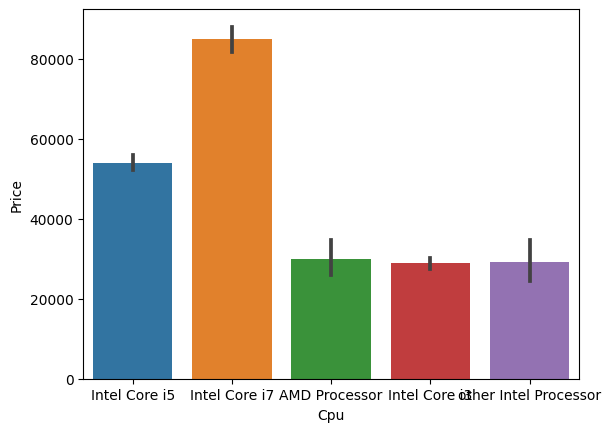

In [50]:
sns.barplot(x=data["Cpu"],y=data['Price'])
plt.show()

## Ram

In [51]:
data['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='Ram', ylabel='Price'>

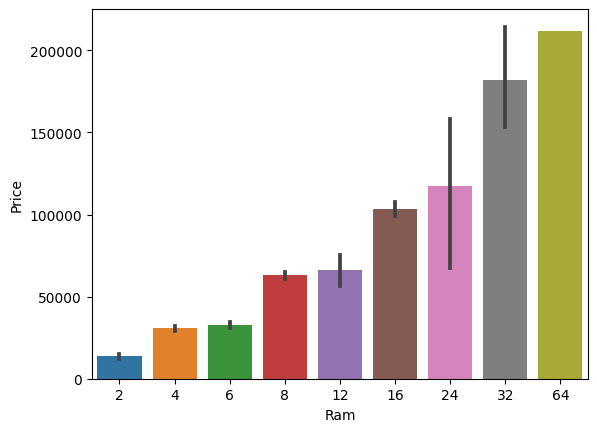

In [52]:
sns.barplot(x=data['Ram'],y=data['Price'])

## Memory-SSD+Flash+HDD+Hybrid

In [53]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [54]:
# Clean and convert the 'Memory' column
data['Memory'] = data['Memory'].astype(str)
data['Memory'] = data['Memory'].replace('\.0', '', regex=True).str.replace('GB', '').str.replace('TB', '000')

# Split 'Memory' into 'first' and 'second'
data[['first', 'second']] = data['Memory'].str.split('+', n=1, expand=True)

# Clean up and ensure 'first' and 'second' contain only numeric values
data['first'] = data['first'].str.extract('(\d+)', expand=False).fillna('0').astype(int)
data['second'] = data['second'].str.extract('(\d+)', expand=False).fillna('0').astype(int)

# Define storage type columns
storage_types = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']

# Initialize storage columns
for storage_type in storage_types:
    data[f'Layer1{storage_type}'] = data['Memory'].str.contains(storage_type).astype(int)
    data[f'Layer2{storage_type}'] = data['Memory'].str.contains(storage_type).astype(int)

# Calculate the storage values
for storage_type in storage_types:
    data[storage_type] = (data['first'] * data[f'Layer1{storage_type}'] +
                          data['second'] * data[f'Layer2{storage_type}'])

# Drop temporary columns
data.drop(columns=[f'Layer1{storage_type}' for storage_type in storage_types] +
                   [f'Layer2{storage_type}' for storage_type in storage_types] +
                   ['first', 'second'], inplace=True)


In [55]:
data.drop(columns=['Memory'],inplace=True)

In [56]:
data.select_dtypes(include=['int','float']).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
IPS Panel        0.252208
Touchscreen      0.191226
ppi              0.473487
HDD             -0.024428
SSD              0.529437
Hybrid           0.023889
Flash Storage   -0.006438
Name: Price, dtype: float64

In [57]:
data.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [58]:
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,0,256


## Gpu

In [59]:
data['Gpu'].value_counts()[:40]

Gpu
Intel HD Graphics 620           281
Intel HD Graphics 520           185
Intel UHD Graphics 620           68
Nvidia GeForce GTX 1050          66
Nvidia GeForce GTX 1060          48
Nvidia GeForce 940MX             43
AMD Radeon 530                   41
Intel HD Graphics 500            39
Intel HD Graphics 400            37
Nvidia GeForce GTX 1070          30
Intel HD Graphics                29
Nvidia GeForce GTX 1050 Ti       28
AMD Radeon R5 M430               22
Nvidia GeForce 930MX             20
AMD Radeon 520                   17
Nvidia GeForce MX150             15
Intel HD Graphics 515            15
Intel HD Graphics 615            14
AMD Radeon R7 M445               14
Nvidia GeForce GTX 960M          14
Nvidia GeForce 920MX             13
Intel HD Graphics 505            12
AMD Radeon R5                    11
Nvidia GeForce GTX 980M          10
Intel HD Graphics 405             9
Nvidia Quadro M1200               9
AMD Radeon R5 M420                8
Intel Iris Plus Graphics

In [60]:
data['Gpu']=data['Gpu'].apply(lambda x:x.split()[0])

In [61]:
data['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [62]:
data = data[data['Gpu'] != 'ARM']

In [63]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [64]:
def Opsys(type_os):
    if(type_os=="Windows 10" or type_os=="Windows 7" or type_os=="Windows 10 S"):
        return "Windows"
    elif(type_os=="macOS" or type_os=="Mac OS X"):
        return "macos"
    else:
        return "No os/Chrome/android"
    

In [65]:
data['OpSys'] = data['OpSys'].apply(Opsys)

In [66]:
data

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel,macos,1.37,71378.6832,1,0,226.983005,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel,macos,1.34,47895.5232,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel,No os/Chrome/android,1.86,30636.0000,0,0,141.211998,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD,macos,1.83,135195.3360,1,0,220.534624,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel,macos,1.37,96095.8080,1,0,226.983005,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7,4,Intel,Windows,1.80,33992.6400,1,1,157.350512,0,128
1299,Lenovo,2 in 1 Convertible,Intel Core i7,16,Intel,Windows,1.30,79866.7200,1,1,276.053530,0,512
1300,Lenovo,Notebook,other Intel Processor,2,Intel,Windows,1.50,12201.1200,0,0,111.935204,0,0
1301,HP,Notebook,Intel Core i7,6,AMD,Windows,2.19,40705.9200,0,0,100.454670,1000,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Cpu          1302 non-null   object 
 3   Ram          1302 non-null   int32  
 4   Gpu          1302 non-null   object 
 5   OpSys        1302 non-null   object 
 6   Weight       1302 non-null   float64
 7   Price        1302 non-null   float64
 8   IPS Panel    1302 non-null   int64  
 9   Touchscreen  1302 non-null   int64  
 10  ppi          1302 non-null   float64
 11  HDD          1302 non-null   int32  
 12  SSD          1302 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 127.1+ KB


In [68]:
data.select_dtypes(include=['int','float']).corr()

,Ram,Weight,Price,IPS Panel,Touchscreen,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.207949,0.118875,0.305688,0.168367,0.587592
Weight,0.383362,1.000000,0.209867,0.018643,-0.293004,-0.321883,0.555889,0.393539
Price,0.742905,0.209867,1.000000,0.253320,0.192917,0.475368,-0.024842,0.529256
IPS Panel,0.207949,0.018643,0.253320,1.000000,0.148026,0.299142,-0.068884,0.172127
Touchscreen,0.118875,-0.293004,0.192917,0.148026,1.000000,0.458571,-0.209055,-0.011860
ppi,0.305688,-0.321883,0.475368,0.299142,0.458571,1.000000,-0.262679,0.202664
HDD,0.168367,0.555889,-0.024842,-0.068884,-0.209055,-0.262679,1.000000,0.443511
SSD,0.587592,0.393539,0.529256,0.172127,-0.011860,0.202664,0.443511,1.000000


In [69]:
data.select_dtypes(include=['int','float']).corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
IPS Panel      0.253320
Touchscreen    0.192917
ppi            0.475368
HDD           -0.024842
SSD            0.529256
Name: Price, dtype: float64

In [70]:
# data.drop(columns=['x_res','y_res'],inplace=True)

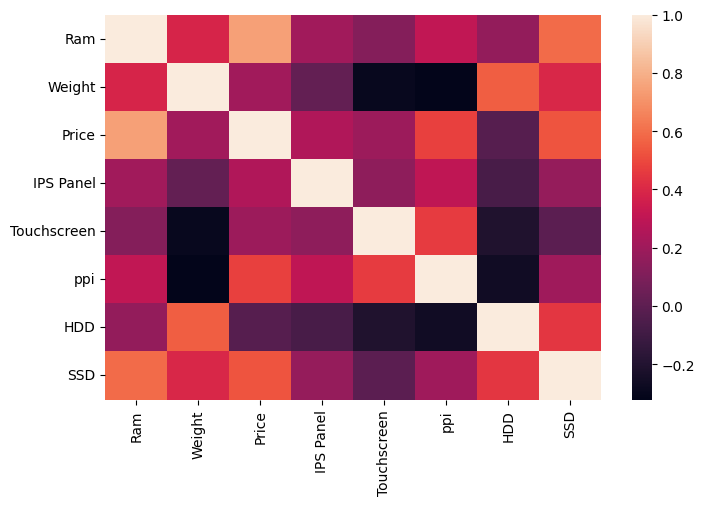

In [71]:
plt.figure(figsize=(8,5))
sns.heatmap(data.select_dtypes(include=['int','float']).corr())
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

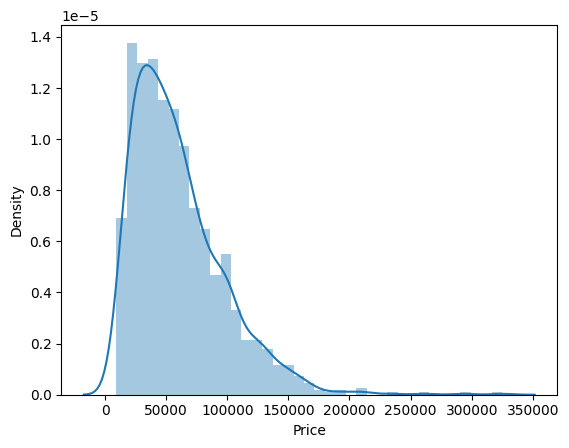

In [72]:
sns.distplot(data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

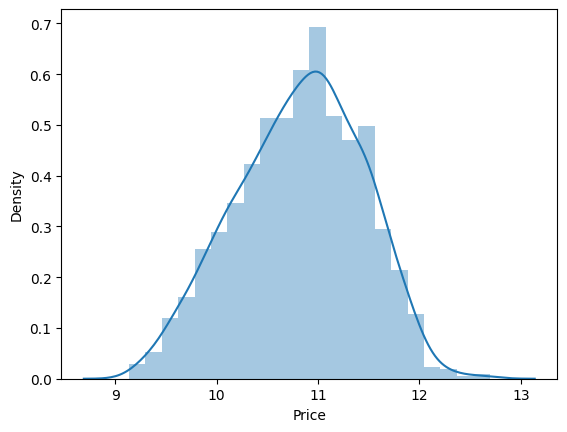

In [73]:
sns.distplot(np.log(data['Price']))

## Model Training

In [74]:
X=data.drop(columns=['Price'])
y=np.log(data['Price'])

In [75]:
data.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel,macos,1.37,71378.6832,1,0,226.983005,0,128


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.15)

In [77]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,IPS Panel,Touchscreen,ppi,HDD,SSD
183,Toshiba,Notebook,Intel Core i5,8,Intel,Windows,2.00,0,0,100.454670,0,128
1141,MSI,Gaming,Intel Core i7,8,Nvidia,Windows,2.40,0,0,141.211998,1128,1128
1049,Asus,Netbook,other Intel Processor,4,Intel,No os/Chrome/android,1.20,0,0,135.094211,0,0
1020,Dell,2 in 1 Convertible,Intel Core i3,4,Intel,Windows,2.08,1,1,141.211998,1000,0
878,Dell,Notebook,Intel Core i5,4,Nvidia,Windows,2.18,0,0,141.211998,1128,1128
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,Intel Core i3,4,Nvidia,Windows,2.20,0,0,100.454670,500,0
299,Asus,Ultrabook,Intel Core i7,16,Nvidia,Windows,1.63,0,0,141.211998,0,512
493,Acer,Notebook,AMD Processor,8,AMD,Windows,2.20,0,0,100.454670,1000,0
527,Lenovo,Notebook,Intel Core i3,8,Nvidia,No os/Chrome/android,2.20,0,0,100.454670,2000,0


In [78]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [79]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# !pip install xgboost
from xgboost import XGBRegressor

## LinearRegression

In [80]:
step1=ColumnTransformer(
    transformers=[(
        'encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys']
    )],remainder='passthrough'
)
step2=StandardScaler()
step3=LinearRegression()
pipe=Pipeline(
    [('step1',step1),
     ('step2',step2),
    ('step3',step3)
    ]
)

In [81]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()), ('step3', LinearRegression())])

In [82]:
y_pred=pipe.predict(X_test)

In [83]:
from sklearn.metrics import r2_score,mean_absolute_error

In [84]:
print('R2_score',r2_score(y_pred,y_test))
print('Mean Absolute Error',mean_absolute_error(y_pred,y_test))

R2_score 0.7682524898322843
Mean Absolute Error 0.21177078793127993


## RidgeRegression

In [85]:
step1=ColumnTransformer(
    transformers=[
('encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys']),
    ],    remainder='passthrough'
)
step2=StandardScaler()
step3=Ridge(alpha=10)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

In [86]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()), ('step3', Ridge(alpha=10))])

In [87]:
y_pred=pipe.predict(X_test)

In [88]:
print('R2_score',r2_score(y_pred,y_test))
print('Mean Absolute Error',mean_absolute_error(y_pred,y_test))

R2_score 0.7661667578650146
Mean Absolute Error 0.2119992551532103


## LassoRegression

In [89]:
step1=ColumnTransformer(
    transformers=[
('encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys']),
    ],    remainder='passthrough'
)
step2=StandardScaler()
step3=Lasso(alpha=0.001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

In [90]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()), ('step3', Lasso(alpha=0.001))])

In [91]:
y_pred=pipe.predict(X_test)
print('R2_score',r2_score(y_pred,y_test))
print('Mean Absolute Error',mean_absolute_error(y_pred,y_test))

R2_score 0.7670975405801397
Mean Absolute Error 0.21113447382421635


## KNN

In [92]:
step1=ColumnTransformer(
    transformers=[
('encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys']),
    ],    remainder='passthrough'
)
step2=StandardScaler()
step3=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()),
                ('step3', KNeighborsRegressor(n_neighbors=3))])

In [93]:
y_pred=pipe.predict(X_test)
print('R2_score',r2_score(y_pred,y_test))
print('Mean Absolute Error',mean_absolute_error(y_pred,y_test))

R2_score 0.8328085329760344
Mean Absolute Error 0.17942915717114202


## Decision Tree

In [94]:
step1=ColumnTransformer(
    transformers=[
('encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys']),
    ],    remainder='passthrough'
)
step2=StandardScaler()
step3=DecisionTreeRegressor(max_depth=7)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])
pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()),
                ('step3', DecisionTreeRegressor(max_depth=7))])

In [95]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Plot the decision tree
# plt.figure(figsize=(20,10))  # Adjust the figure size as needed
# tree.plot_tree(dtree, 
#                feature_names=pipe.named_steps['step1'].get_feature_names_out(), 
#                filled=True, 
#                rounded=True, 
#                fontsize=10)

# plt.show()


In [96]:
y_pred=pipe.predict(X_test)
print('R2_score',r2_score(y_pred,y_test))
print('Mean Absolute Error',mean_absolute_error(y_pred,y_test))

R2_score 0.8225924832633791
Mean Absolute Error 0.17809434039674768


## SVM

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8051070781543326
MAE 0.20654483886707525


## Random Forest

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811365154721761
MAE 0.16265383114522422


## Extra Trees

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              # max_samples=0.5
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8802301394083303
MAE 0.15725216707040635


## Adaboost

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7879097252009181
MAE 0.23250237538430651


## GradientBoost

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8823783634454183
MAE 0.15701916178529035


## XG BOOSt

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8822215023430791
MAE 0.15316631323555752


## Voting Regressor

In [122]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
step1=ColumnTransformer(
    transformers=[('encoder',OneHotEncoder(sparse_output=False,drop='first'),['Company','TypeName','Cpu','Gpu','OpSys'])]
    ,remainder='passthrough'
)
step2=StandardScaler()
Xg=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
gd = GradientBoostingRegressor(n_estimators=500)
ex = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              # max_samples=0.5
                              max_features=0.75,
                              max_depth=15)
random = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model=VotingRegressor([('Xg',Xg),('gd',gd),('ex',ex),('random',random)])
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',model)
])
pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('step2', StandardScaler()),
                ('step3',
                 VotingRegressor(estimators=[('Xg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_byn...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=45,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...)),
                                             ('gd',
                                              GradientBoostingRegressor(n_estimators=500)),
                                             ('ex',
                                              ExtraTreesRegressor(max_depth=15,
                                                                  max_features=0.75,
                                                                  random_state=3)),
                                             ('random',
                                              RandomForestRegressor(max_depth=15,
                                                                    max_features=0.75,
                                                                    max_samples=0.5,
                                                                    random_state=3))]))])

In [123]:

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8945176516877353
MAE 0.14872739387639375


## Stacking Regressor

In [120]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# estimators = [
#     ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
#     ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
#     ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
# ]

# step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

## Exporting the Model

In [124]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))#most recent pipe

In [125]:
#deploying Steps
#1-train ml model,export pickle file
#2-create a floder(may be already created) and create a virtual environment in it(python -m venv name_of_virtualenv),
# then a new folder will be created and activate the virtualenv like this ---> Virtualenv\Scripts\activate
# and then create a gitignore file,bring pkl file to project folder(not virtualenv folder)
# Now create a flask app in the project folder and install libraries inside virenv and
# create requirements.txt file   :  pip freeze > requirements.txt
# 3-you can check its running by python app.py
# 4-


In [139]:
# X_train